In [1]:
# Импорт необходимых библиотек
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

# Настройка для отображения графиков
sns.set_theme()  # Используем настройки seaborn напрямую
plt.style.use('default')  # Используем стандартный стиль matplotlib

# Для воспроизводимости результатов
np.random.seed(42)

# Создаем тестовые наборы данных
# 1. Данные для одновыборочного t-теста
sample_1 = np.random.normal(loc=102, scale=15, size=100)  # Рост студентов

# 2. Данные для двухвыборочного t-теста
group_a = np.random.normal(loc=75, scale=10, size=50)  # Результаты теста группы A
group_b = np.random.normal(loc=80, scale=10, size=50)  # Результаты теста группы B

# 3. Данные для теста хи-квадрат
# Создадим данные о предпочтениях в еде и музыке
food_preferences = np.random.choice(['Пицца', 'Суши', 'Бургер'], size=100)
music_preferences = np.random.choice(['Рок', 'Поп', 'Джаз'], size=100)

# 4. Данные для ANOVA
group_1 = np.random.normal(loc=20, scale=5, size=30)  # Метод обучения 1
group_2 = np.random.normal(loc=22, scale=5, size=30)  # Метод обучения 2
group_3 = np.random.normal(loc=25, scale=5, size=30)  # Метод обучения 3

### Задание для самостоятельной работы

Вам предоставлены данные о времени выполнения теста студентами. Предполагается, что среднее время выполнения теста составляет 45 минут.

Проведите одновыборочный t-тест, чтобы проверить это предположение:

1. Создайте выборку из 80 наблюдений со средним 47 минут и стандартным отклонением 5 минут
2. Сформулируйте нулевую и альтернативную гипотезы
3. Визуализируйте данные
4. Проведите t-тест
5. Сделайте выводы

Используйте приведенный выше пример как образец для выполнения задания.

Описательная статистика:
Среднее время: 47.55 мин
Стандартное отклонение: 5.04 мин


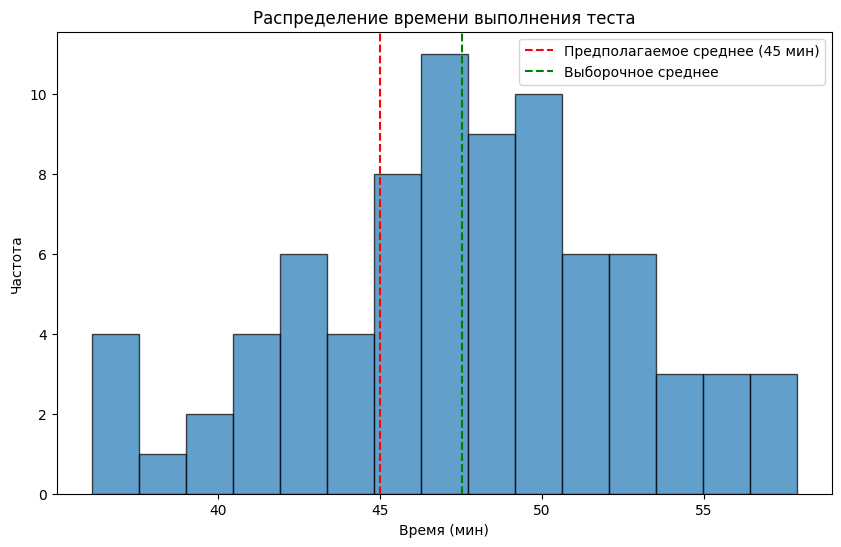


Результаты t-теста:
t-статистика: 4.5183
p-значение: 0.0000
Отвергаем: среднее время статистически отличается от 45 минут


In [3]:

test_times = np.random.normal(loc=47, scale=5, size=80)

print("Описательная статистика:")
print(f"Среднее время: {np.mean(test_times):.2f} мин")
print(f"Стандартное отклонение: {np.std(test_times, ddof=1):.2f} мин")

plt.figure(figsize=(10, 6))
plt.hist(test_times, bins=15, edgecolor='black', alpha=0.7)
plt.axvline(45, color='red', linestyle='--', label='Предполагаемое среднее (45 мин)')
plt.axvline(np.mean(test_times), color='green', linestyle='--', label='Выборочное среднее')
plt.title('Распределение времени выполнения теста')
plt.xlabel('Время (мин)')
plt.ylabel('Частота')
plt.legend()
plt.show()

t_stat, p_val = stats.ttest_1samp(test_times, 45)

print("\nРезультаты t-теста:")
print(f"t-статистика: {t_stat:.4f}")
print(f"p-значение: {p_val:.4f}")

if p_val < 0.05:
    print("Отвергаем: среднее время статистически отличается от 45 минут")
else:
    print("Не отвергаем: среднее время не отличается от 45 минут")


### Задание для самостоятельной работы

Проведите сравнительный анализ эффективности двух методов тренировки:

1. Создайте две выборки:
   - Группа 1: 40 спортсменов, тренирующихся по методу A (среднее время = 15 минут, станд. откл. = 3)
   - Группа 2: 40 спортсменов, тренирующихся по методу B (среднее время = 17 минут, станд. откл. = 3)

2. Задачи:
   - Сформулируйте гипотезы
   - Создайте визуализации для сравнения групп
   - Проведите двухвыборочный t-тест
   - Сделайте выводы об эффективности методов тренировки

Используйте приведенный выше пример как образец для выполнения задания.

Описательная статистика:
Метод A: среднее = 15.24, σ = 3.17
Метод B: среднее = 17.31, σ = 3.26


/var/folders/32/tn9_k17x1wbfxhhphlt7mjx00000gn/T/ipykernel_20373/1602435953.py:11: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([group_a, group_b], labels=['Метод A', 'Метод B'])


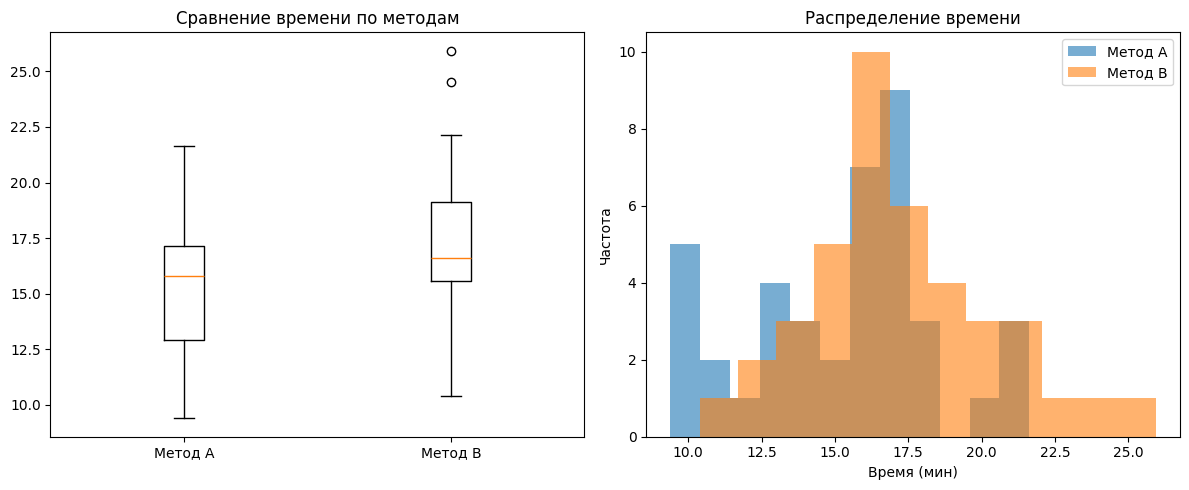


Результаты двухвыборочного t-теста:
t-статистика: -2.8899
p-значение: 0.0050
Отвергаем: методы дают разные результаты (стат. значимые различия)


In [4]:
group_a = np.random.normal(loc=15, scale=3, size=40)
group_b = np.random.normal(loc=17, scale=3, size=40)

print("Описательная статистика:")
print(f"Метод A: среднее = {np.mean(group_a):.2f}, σ = {np.std(group_a, ddof=1):.2f}")
print(f"Метод B: среднее = {np.mean(group_b):.2f}, σ = {np.std(group_b, ddof=1):.2f}")

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.boxplot([group_a, group_b], labels=['Метод A', 'Метод B'])
plt.title('Сравнение времени по методам')

plt.subplot(1, 2, 2)
plt.hist(group_a, bins=12, alpha=0.6, label='Метод A')
plt.hist(group_b, bins=12, alpha=0.6, label='Метод B')
plt.title('Распределение времени')
plt.xlabel('Время (мин)')
plt.ylabel('Частота')
plt.legend()
plt.tight_layout()
plt.show()

t_stat, p_val = stats.ttest_ind(group_a, group_b)

print("\nРезультаты двухвыборочного t-теста:")
print(f"t-статистика: {t_stat:.4f}")
print(f"p-значение: {p_val:.4f}")

# 5. Вывод
if p_val < 0.05:
    print("Отвергаем: методы дают разные результаты (стат. значимые различия)")
else:
    print("Не отвергаем: различия между методами незначимы")


### Задание для самостоятельной работы

Проведите анализ связи между полом студентов и их выбором специальности:

1. Создайте данные:
   - 100 студентов
   - Пол: 'М' или 'Ж'
   - Специальность: 'Информатика', 'Биология', 'Физика'

2. Задачи:
   - Сформулируйте гипотезы
   - Создайте таблицу сопряженности
   - Визуализируйте данные с помощью тепловой карты
   - Проведите тест хи-квадрат
   - Интерпретируйте результаты

Используйте приведенный выше пример как образец для выполнения задания.

Таблица сопряженности:
Специальность  Биология  Информатика  Физика
Пол                                         
Ж                    11           17      16
М                    22           13      21


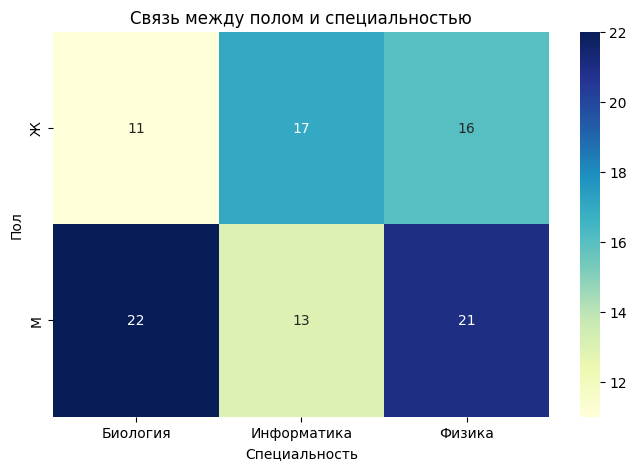


Результаты теста χ^2:
χ^2 = 3.4859
p-значение = 0.1750
Степени свободы = 2
Не отвергаем: связи между полом и специальностью нет


In [5]:
gender = np.random.choice(['М', 'Ж'], size=100)
major = np.random.choice(['Информатика', 'Биология', 'Физика'], size=100)
data = pd.DataFrame({'Пол': gender, 'Специальность': major})

contingency = pd.crosstab(data['Пол'], data['Специальность'])
print("Таблица сопряженности:")
print(contingency)

plt.figure(figsize=(8, 5))
sns.heatmap(contingency, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Связь между полом и специальностью')
plt.show()

chi2, p_val, dof, exp = stats.chi2_contingency(contingency)

print("\nРезультаты теста χ^2:")
print(f"χ^2 = {chi2:.4f}")
print(f"p-значение = {p_val:.4f}")
print(f"Степени свободы = {dof}")

if p_val < 0.05:
    print("Отвергаем: есть статистически значимая связь между полом и выбором специальности")
else:
    print("Не отвергаем: связи между полом и специальностью нет")


### Задание для самостоятельной работы

Проведите сравнительный анализ эффективности трех различных диет:

1. Создайте данные для трех групп по 25 человек:
   - Диета А: среднее снижение веса 5 кг, станд. откл. = 1.5
   - Диета B: среднее снижение веса 6 кг, станд. откл. = 1.5
   - Диета C: среднее снижение веса 4 кг, станд. откл. = 1.5

2. Задачи:
   - Сформулируйте гипотезы
   - Создайте визуализации для сравнения групп
   - Проведите однофакторный дисперсионный анализ
   - Сделайте выводы об эффективности диет


Описательная статистика:
Диета A: среднее = 4.54, σ = 1.42
Диета B: среднее = 6.51, σ = 1.64
Диета C: среднее = 4.14, σ = 1.12


/var/folders/32/tn9_k17x1wbfxhhphlt7mjx00000gn/T/ipykernel_20373/2393964590.py:15: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(groups, labels=labels)


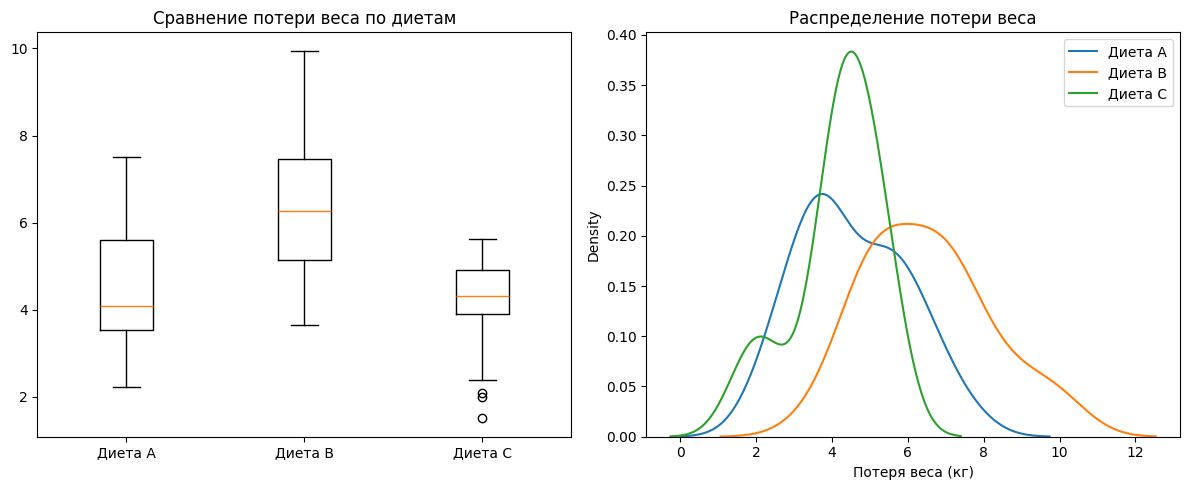


Результаты ANOVA:
F-статистика: 20.1581
p-значение: 0.0000
Отвергаем: есть статистически значимые различия между диетами


In [6]:
diet_a = np.random.normal(loc=5, scale=1.5, size=25)
diet_b = np.random.normal(loc=6, scale=1.5, size=25)
diet_c = np.random.normal(loc=4, scale=1.5, size=25)

groups = [diet_a, diet_b, diet_c]
labels = ['Диета A', 'Диета B', 'Диета C']

print("Описательная статистика:")
for name, g in zip(labels, groups):
    print(f"{name}: среднее = {np.mean(g):.2f}, σ = {np.std(g, ddof=1):.2f}")

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.boxplot(groups, labels=labels)
plt.title('Сравнение потери веса по диетам')

plt.subplot(1, 2, 2)
for g, name in zip(groups, labels):
    sns.kdeplot(g, label=name)
plt.title('Распределение потери веса')
plt.xlabel('Потеря веса (кг)')
plt.legend()
plt.tight_layout()
plt.show()

f_stat, p_val = stats.f_oneway(diet_a, diet_b, diet_c)

print("\nРезультаты ANOVA:")
print(f"F-статистика: {f_stat:.4f}")
print(f"p-значение: {p_val:.4f}")

if p_val < 0.05:
    print("Отвергаем: есть статистически значимые различия между диетами")
else:
    print("Не отвергаем: различия между диетами незначимы")
